#Prediction of wine quality using various regression mehods

Data taken from the Wine Quality Data Set at UCI ML repo https://archive.ics.uci.edu/ml/datasets/Wine+Quality   
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.   
  Modeling wine preferences by data mining from physicochemical properties.  
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#downloading white wine data 
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_whitewine = pd.read_csv(file_path, delimiter = ";")

In [ ]:
display(df_whitewine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Observations:

1. There are 12 columns, which includes 11 features and 1 output ('quality')
2. Data has 4898 samples


## Exploratory Data Analysis


Looking at the data types of each column

In [ ]:
print(df_whitewine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Thus, all features are float variables. Only the output variable 'quality' is an integer

Observing the number of unique values, NaN entries, and ranges of values for each column.

In [ ]:
#cheking if there is any null entry
df_whitewine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
for col_white in df_whitewine.columns.values: # for each column
  unique_entries = pd.unique(df_whitewine[col_white]) # unique elements in a column
  print(f"The column '{col_white}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries")

The column 'fixed acidity' has range 3.8 to 14.2, has 68 unique entries
The column 'volatile acidity' has range 0.08 to 1.1, has 125 unique entries
The column 'citric acid' has range 0.0 to 1.66, has 87 unique entries
The column 'residual sugar' has range 0.6 to 65.8, has 310 unique entries
The column 'chlorides' has range 0.009000000000000001 to 0.34600000000000003, has 160 unique entries
The column 'free sulfur dioxide' has range 2.0 to 289.0, has 132 unique entries
The column 'total sulfur dioxide' has range 9.0 to 440.0, has 251 unique entries
The column 'density' has range 0.98711 to 1.03898, has 890 unique entries
The column 'pH' has range 2.72 to 3.82, has 103 unique entries
The column 'sulphates' has range 0.22 to 1.08, has 79 unique entries
The column 'alcohol' has range 8.0 to 14.2, has 103 unique entries
The column 'quality' has range 3 to 9, has 7 unique entries


Observations:
1. Columns have varied ranges
2. No column has NaN values
3. All of them (except 'quality'=output variable) have large number of unique entries.
4. Quality has 7 unique values.

Plotting histograms to observe the spread of columns

In [ ]:
def get_column_histograms(df):
  num_cols_df = len(df.columns.values)
  n_rows_in_hist = int(np.ceil( np.sqrt(num_cols_df) ))
  while num_cols_df % n_rows_in_hist is not 0:
    n_rows_in_hist -= 1
  # on exiting the loop, n_rows_in_hist is a factor of num_cols_df
  n_cols_in_hist = num_cols_df/ n_rows_in_hist
  count = 1
  for col in df.columns.values:
    plt.subplot(n_rows_in_hist, n_cols_in_hist, count)
    plt.tight_layout()
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("counts")  
    count +=1
  plt.show()

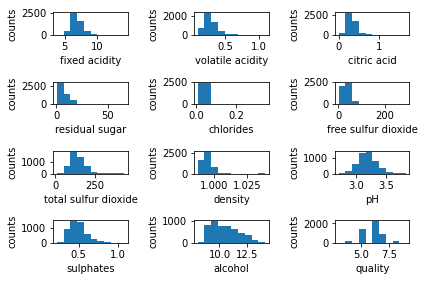

In [ ]:
get_column_histograms(df_whitewine)

Observations:
1. Many features have a skewed distribution
2. Chlorides have less variance- values are very close to a central value
3. All other features have significant variance

Plotting scatter matrix to observe correlation, diagonal entries are probability densitiy functions

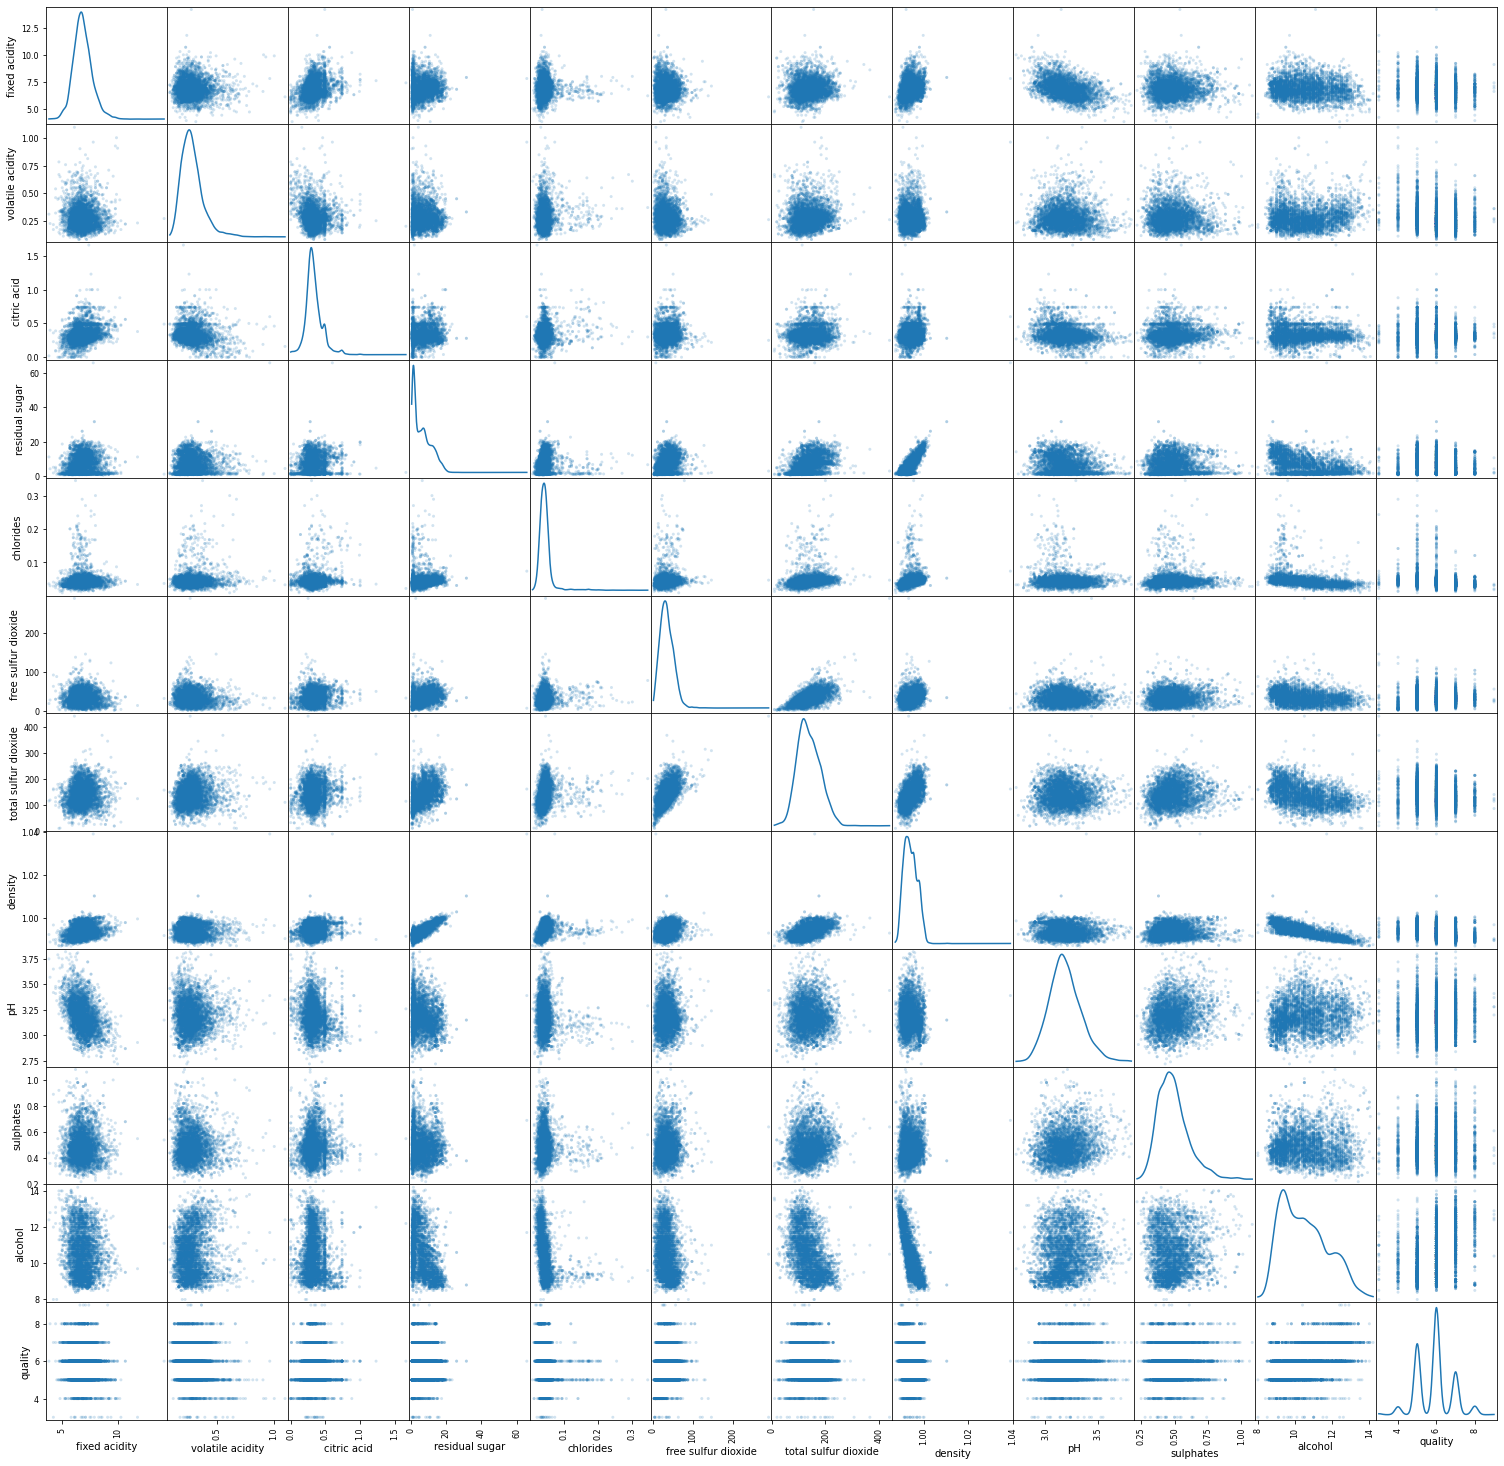

In [ ]:
pd.plotting.scatter_matrix(df_whitewine, alpha = 0.2, figsize=(26, 26), diagonal = 'kde')
plt.show()

Scatter plots don't show much correlation among the variables.  
Multiple horizontal or vertical lines indicate quantized values

Plotting correlation matrix

In [ ]:
import seaborn as sns

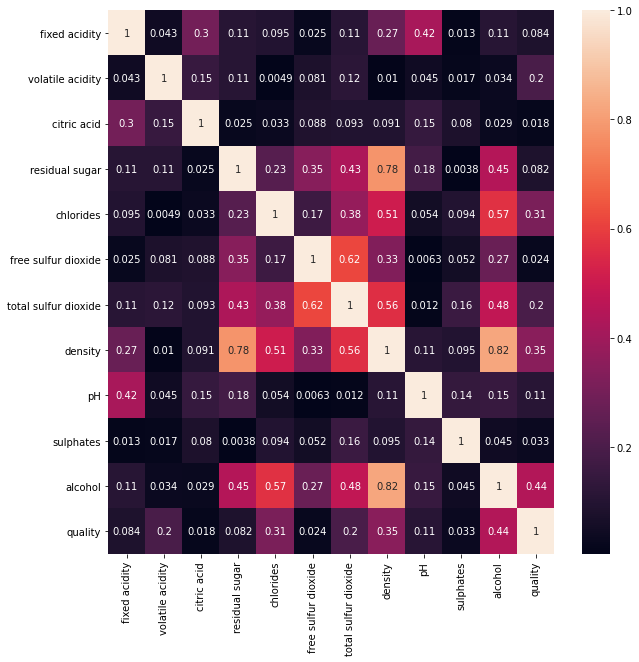

In [ ]:
corr_matrix = df_whitewine.corr(method = "spearman")
plt.subplots(figsize = (10,10))
sns.heatmap(abs(corr_matrix), annot = True)
plt.show()

Correlation is not too high between columns. Hence, **all columns are used** for training the model

## Train test split 

In [ ]:
from sklearn.model_selection import train_test_split

cols_of_features = df_whitewine.columns.values 
cols_of_features = cols_of_features[cols_of_features != 'quality']

X_white = df_whitewine[cols_of_features] 
y_white = df_whitewine['quality']        

X_white_train,  X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size = 0.20, random_state=42)

print(f"{X_white_train.shape}, {y_white_train.shape}, {X_white_test.shape}, {y_white_test.shape}")


(3918, 11), (3918,), (980, 11), (980,)


## Preprocessing data: All column values are normalized

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_white_train)
X_white_train = scaler.transform(X_white_train)
X_white_test = scaler.transform(X_white_test)


## Training, validation and testing

In [ ]:
def get_grid_search_results(estimator, hyper_parameters, scoring, train_X, train_y):
  """ This function takes an estimator, hyperparameters to be tested, scoring mechanism and training data. It performs k-fold cross 
  validation for each of the hyperparameter, calculates scores for the given estimator and prints hyperparametervalue which has best 
  score. """
  clf = GridSearchCV(estimator = estimator, param_grid = hyper_parameters, scoring=scoring, cv=5)  # perform 5 fold cross validation over alpha=0.1, 0.5
  clf.fit(train_X, train_y)
  print(f"Best parameters: \n {clf.best_params_}")

In [ ]:
def get_trained_model(estimator, train_X, train_y, test_X, test_y, metric_for_test):
  """ This function takes an estimator, training and testing data, and a metric for evaluation. It trains the estimator on training data,
  gets predictions on test data and returns trained estimator and performance results."""
  estimator.fit(train_X, train_y)
  y_predict = estimator.predict(test_X)
  performance = metric_for_test(test_y, y_predict)
  return estimator, performance

###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

hyperparameters = {'alpha':[0.001,0.002,0.005,0.01, 0.02, 0.05]}
get_grid_search_results(Lasso(), hyperparameters, 'neg_mean_squared_error', X_white_train, y_white_train)

Best parameters: 
 {'alpha': 0.005}


In [ ]:
#using best found hyperparameter value for training the model

lasso_model, lasso_mse = get_trained_model(Lasso(alpha=0.005), X_white_train, y_white_train, X_white_test, y_white_test, mean_squared_error)
print(f"mean squared error value for alpha = 0.005 on test data is {lasso_mse}")
print(f"model coefficients {lasso_model.coef_}")
print(f"model intercept {lasso_model.intercept_}")


mean squared error value for alpha = 0.005 on test data is 0.5727176848629267
model coefficients [-0.         -0.19454007 -0.00330278  0.25457688 -0.00514074  0.07949454
 -0.00434526 -0.21960614  0.05649804  0.05922022  0.34561445]
model intercept 5.871362940275648


In [ ]:
# r2 score
print("lasso training score:",lasso_model.score(X_white_train, y_white_train ))
print("lasso test score:", lasso_model.score(X_white_test, y_white_test))

lasso training score: 0.28273449155987884
lasso test score: 0.26050671340520515


In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score

y_white_train_pred = lasso_model.predict(X_white_train)
y_white_test_pred = lasso_model.predict(X_white_test)
print('Train Accuracy score :',accuracy_score(y_white_train,y_white_train_pred.round()))
print('Test Accuracy score :',accuracy_score(y_white_test,y_white_test_pred.round()))

Train Accuracy score : 0.5214395099540582
Test Accuracy score : 0.5081632653061224


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

hyperparameters_random_forest = {'max_depth':[2, 5, 10, 50, 100,150,200]}
get_grid_search_results(RandomForestRegressor(),hyperparameters_random_forest,'neg_mean_squared_error',X_white_train, y_white_train )


Best parameters: 
 {'max_depth': 200}


In [ ]:
#using best found parameters for model training
cf_model, cf_mse = get_trained_model(RandomForestRegressor(max_depth = 50), X_white_train, y_white_train, X_white_test, y_white_test, mean_squared_error)
print(f"mean squared error value for max depth = 50 on test data is {cf_mse}")


mean squared error value for max depth = 50 on test data is 0.34745704081632656


In [ ]:
#accuracy score
y_white_train_pred = cf_model.predict(X_white_train)
y_white_test_pred = cf_model.predict(X_white_test)
print('Train Accuracy score :',accuracy_score(y_white_train,y_white_train_pred.round()))
print('Test Accuracy score :',accuracy_score(y_white_test,y_white_test_pred.round()))

Train Accuracy score : 0.955079122001021
Test Accuracy score : 0.6887755102040817


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

hyperparameters_svr = {'kernel':['rbf', 'linear'], 'C':[0.1, 1, 10]}
get_grid_search_results(SVR(), hyperparameters_svr, 'neg_mean_squared_error', X_white_train, y_white_train)

Best parameters: 
 {'C': 1, 'kernel': 'rbf'}


In [ ]:
#using best found parameters for model training
svr_model, svr_mse = get_trained_model(SVR(kernel = "rbf", C = 1), X_white_train, y_white_train, X_white_test, y_white_test, mean_squared_error)
print(f"mean squared error value for rbf kernel and C=1 on test data is {svr_mse}")

mean squared error value for rbf kernel and C=1 on test data is 0.4709170498756319


In [ ]:
#accuracy score
y_white_train_pred = svr_model.predict(X_white_train)
y_white_test_pred = svr_model.predict(X_white_test)
print('Train Accuracy score :',accuracy_score(y_white_train,y_white_train_pred.round()))
print('Test Accuracy score :',accuracy_score(y_white_test,y_white_test_pred.round()))

Train Accuracy score : 0.6337417049515058
Test Accuracy score : 0.573469387755102
